* 什么是CNN:  
定义+引用+优点+缺点  
* CNN的重要组成部分:  
  1.卷积层: 定义+引用+图例数学说明  
  2.池化层: 定义+引用+图例数学说明  
  3.全连接层: 定义+引用+图例数学说明  
* CNN的经典架构有哪些:  
  尽可能罗列出来  
* 本文探究的经典架构为:  
  1. VGG_16:  
  解释说明
  2. VGG_19:  
  解释说明
  3. ResNet_18:  
  解释说明  
  4. ResNet_34:  
  解释说明  
  4. ResNet_50:  
  解释说明
* 本文实用的数据为CIFAR-10 dataset:  
  解释说明+reference  
* 运行:  
  a) VGG_16+CIFAR-10   
  b) VGG_19+CIFAR-10  
  c) ResNet_18+CIFAR-10  
  d) ResNet_34+CIFAR-10  
  e) ResNet_34+CIFAR-10  
* 结果与讨论  



/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


100%|██████████| 170498071/170498071 [00:03<00:00, 56327627.23it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Epoch 1/10:
  Training Loss: 2.0184, Accuracy: 25.58%
  Testing Loss: 1.6585, Accuracy: 39.83%
Epoch 2/10:
  Training Loss: 1.5718, Accuracy: 42.64%
  Testing Loss: 1.4167, Accuracy: 49.12%
Epoch 3/10:
  Training Loss: 1.3913, Accuracy: 49.45%
  Testing Loss: 1.2211, Accuracy: 56.16%
Epoch 4/10:
  Training Loss: 1.2499, Accuracy: 55.11%
  Testing Loss: 1.1367, Accuracy: 59.65%
Epoch 5/10:
  Training Loss: 1.1172, Accuracy: 60.10%
  Testing Loss: 1.0312, Accuracy: 63.72%
Epoch 6/10:
  Training Loss: 1.0043, Accuracy: 64.49%
  Testing Loss: 0.8979, Accuracy: 68.70%
Epoch 7/10:
  Training Loss: 0.9121, Accuracy: 67.72%
  Testing Loss: 0.8470, Accuracy: 71.15%
Epoch 8/10:
  Training Loss: 0.8313, Accuracy: 70.90%
  Testing Loss: 0.8413, Accuracy: 71.23%
Epoch 9/10:
  Training Loss: 0.7616, Accuracy: 73.31%
  Testing Loss: 0.7668, Accuracy: 73.35%
Epoch 10/10:
  Training Loss: 0.7058, Accuracy: 75.25%
 

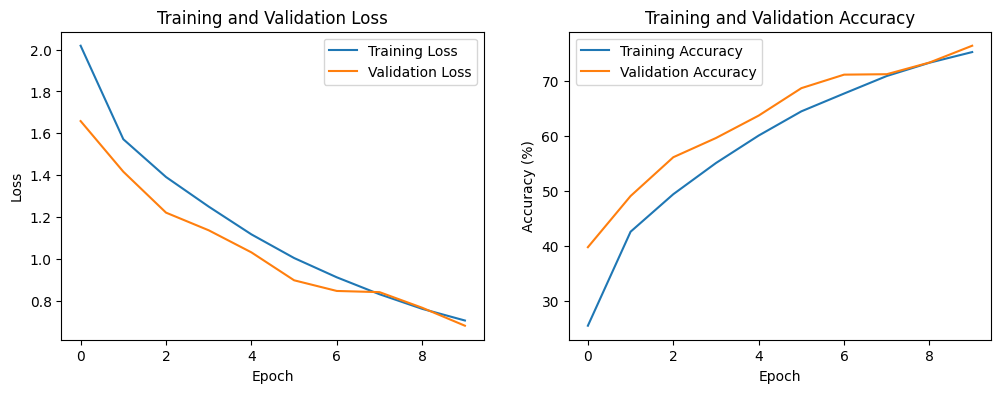

In [ ]:
# VGG_16 pretrained=False
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define a function to load CIFAR-10 data
def load_cifar10_data(batch_size=64):
    transform = transforms.Compose(
        [transforms.RandomHorizontalFlip(),
         transforms.Resize(224),
         transforms.RandomCrop(224, padding=4),
         transforms.ToTensor(),
         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

    trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                              shuffle=True, num_workers=2)

    testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                           download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                             shuffle=False, num_workers=2)

    classes = ('plane', 'car', 'bird', 'cat',
               'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

    return trainloader, testloader, classes

# Define the VGG16 model
import torchvision.models as models
model = models.vgg16(pretrained=False)
model.classifier[6] = nn.Linear(4096, 10)

# Set hyperparameters
batch_size = 64
learning_rate = 0.001
epochs = 10

# Check if a GPU is available, otherwise use CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)  # Move the model to the selected device
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

# Define the training function
def train(net, trainloader, criterion, optimizer, device):
    net.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_loss = running_loss / (i + 1)
    train_accuracy = 100 * correct / total
    return train_loss, train_accuracy

# Define the testing function
def test(net, testloader, criterion, device):
    net.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = net(inputs)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    test_loss = running_loss / len(testloader)
    test_accuracy = 100 * correct / total
    return test_loss, test_accuracy

# Load CIFAR-10 data
trainloader, testloader, classes = load_cifar10_data(batch_size)

# Training loop
train_losses, train_accuracies, test_losses, test_accuracies = [], [], [], []
for epoch in range(epochs):
    train_loss, train_accuracy = train(model, trainloader, criterion, optimizer, device)
    test_loss, test_accuracy = test(model, testloader, criterion, device)

    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    print(f"Epoch {epoch+1}/{epochs}:")
    print(f"  Training Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.2f}%")
    print(f"  Testing Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.2f}%")

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Training Loss")
plt.plot(test_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title('Training and Validation Loss')

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label="Training Accuracy")
plt.plot(test_accuracies, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:07<00:00, 72.2MB/s]


Files already downloaded and verified
Files already downloaded and verified
Epoch 1/10:
  Training Loss: 0.4940, Accuracy: 82.88%
  Testing Loss: 0.3132, Accuracy: 89.12%
Epoch 2/10:
  Training Loss: 0.2585, Accuracy: 91.12%
  Testing Loss: 0.2388, Accuracy: 91.85%
Epoch 3/10:
  Training Loss: 0.2022, Accuracy: 92.97%
  Testing Loss: 0.2114, Accuracy: 92.70%
Epoch 4/10:
  Training Loss: 0.1623, Accuracy: 94.41%
  Testing Loss: 0.2009, Accuracy: 93.24%
Epoch 5/10:
  Training Loss: 0.1374, Accuracy: 95.32%
  Testing Loss: 0.2203, Accuracy: 92.82%
Epoch 6/10:
  Training Loss: 0.1081, Accuracy: 96.33%
  Testing Loss: 0.1880, Accuracy: 93.53%
Epoch 7/10:
  Training Loss: 0.0909, Accuracy: 96.88%
  Testing Loss: 0.1994, Accuracy: 93.59%
Epoch 8/10:
  Training Loss: 0.0766, Accuracy: 97.32%
  Testing Loss: 0.2422, Accuracy: 93.04%
Epoch 9/10:
  Training Loss: 0.0664, Accuracy: 97.68%
  Testing Loss: 0.2246, Accuracy: 93.33%
Epoch 10/10:
  Training Loss: 0.0583, Accuracy: 97.99%
  Testing Loss

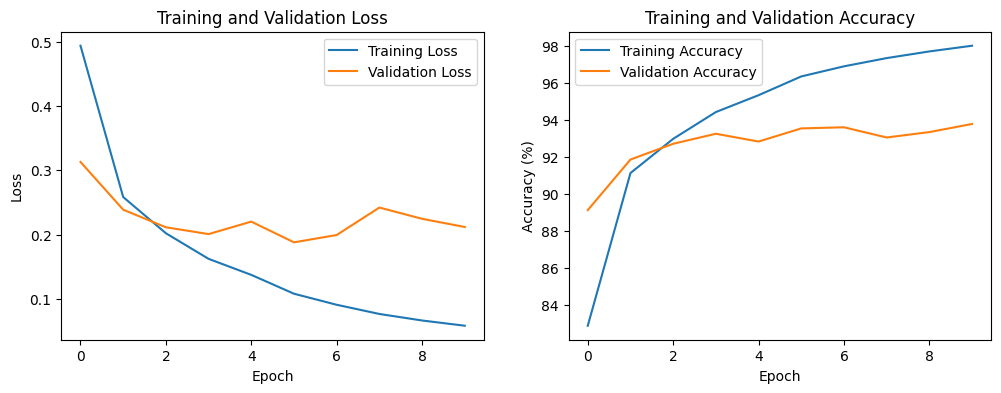

In [ ]:
# VGG_16 pretrained=True
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define a function to load CIFAR-10 data
def load_cifar10_data(batch_size=64):
    transform = transforms.Compose(
        [transforms.RandomHorizontalFlip(),
         transforms.Resize(224),
         transforms.RandomCrop(224, padding=4),
         transforms.ToTensor(),
         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

    trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                              shuffle=True, num_workers=2)

    testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                           download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                             shuffle=False, num_workers=2)

    classes = ('plane', 'car', 'bird', 'cat',
               'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

    return trainloader, testloader, classes

# Define the VGG16 model
import torchvision.models as models
model = models.vgg16(pretrained=True)
model.classifier[6] = nn.Linear(4096, 10)

# Set hyperparameters
batch_size = 64
learning_rate = 0.001
epochs = 10

# Check if a GPU is available, otherwise use CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)  # Move the model to the selected device
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

# Define the training function
def train(net, trainloader, criterion, optimizer, device):
    net.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_loss = running_loss / (i + 1)
    train_accuracy = 100 * correct / total
    return train_loss, train_accuracy

# Define the testing function
def test(net, testloader, criterion, device):
    net.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = net(inputs)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    test_loss = running_loss / len(testloader)
    test_accuracy = 100 * correct / total
    return test_loss, test_accuracy

# Load CIFAR-10 data
trainloader, testloader, classes = load_cifar10_data(batch_size)

# Training loop
train_losses, train_accuracies, test_losses, test_accuracies = [], [], [], []
for epoch in range(epochs):
    train_loss, train_accuracy = train(model, trainloader, criterion, optimizer, device)
    test_loss, test_accuracy = test(model, testloader, criterion, device)

    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    print(f"Epoch {epoch+1}/{epochs}:")
    print(f"  Training Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.2f}%")
    print(f"  Testing Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.2f}%")

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Training Loss")
plt.plot(test_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title('Training and Validation Loss')

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label="Training Accuracy")
plt.plot(test_accuracies, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()

Files already downloaded and verified
Files already downloaded and verified
Epoch 1/10:
  Training Loss: 2.0267, Accuracy: 24.82%
  Testing Loss: 1.6328, Accuracy: 39.87%
Epoch 2/10:
  Training Loss: 1.5666, Accuracy: 42.63%
  Testing Loss: 1.4123, Accuracy: 48.24%
Epoch 3/10:
  Training Loss: 1.3754, Accuracy: 49.98%
  Testing Loss: 1.2755, Accuracy: 54.61%
Epoch 4/10:
  Training Loss: 1.2264, Accuracy: 55.76%
  Testing Loss: 1.0818, Accuracy: 61.08%
Epoch 5/10:
  Training Loss: 1.0928, Accuracy: 60.96%
  Testing Loss: 0.9745, Accuracy: 65.37%
Epoch 6/10:
  Training Loss: 0.9744, Accuracy: 65.72%
  Testing Loss: 0.8970, Accuracy: 68.47%
Epoch 7/10:
  Training Loss: 0.8748, Accuracy: 69.12%
  Testing Loss: 0.8346, Accuracy: 71.18%
Epoch 8/10:
  Training Loss: 0.7973, Accuracy: 72.20%
  Testing Loss: 0.7508, Accuracy: 73.90%
Epoch 9/10:
  Training Loss: 0.7390, Accuracy: 74.18%
  Testing Loss: 0.7097, Accuracy: 75.07%
Epoch 10/10:
  Training Loss: 0.6827, Accuracy: 75.92%
  Testing Loss

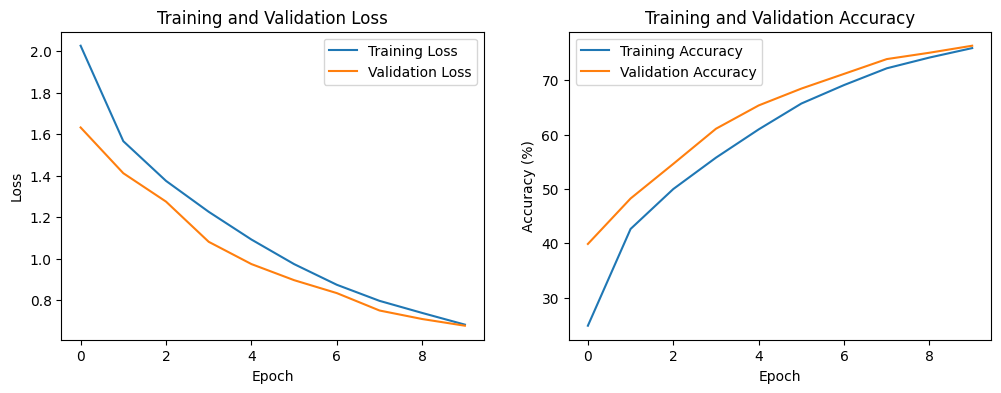

In [ ]:
# VGG_19 pretrained=False
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define a function to load CIFAR-10 data
def load_cifar10_data(batch_size=64):
    transform = transforms.Compose(
        [transforms.RandomHorizontalFlip(),
         transforms.Resize(224),
         transforms.RandomCrop(224, padding=4),
         transforms.ToTensor(),
         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

    trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                              shuffle=True, num_workers=2)

    testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                           download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                             shuffle=False, num_workers=2)

    classes = ('plane', 'car', 'bird', 'cat',
               'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

    return trainloader, testloader, classes


# Load CIFAR-10 data
trainloader, testloader, classes = load_cifar10_data(batch_size=64)

# Define the VGG19 model with pretrained=False
import torchvision.models as models
model = models.vgg19(pretrained=False)
model.classifier[6] = nn.Linear(4096, 10)

# Set hyperparameters
learning_rate = 0.001
epochs = 10

# Check if a GPU is available, otherwise use CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

# Define the training function
def train(net, trainloader, criterion, optimizer, device):
    net.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_loss = running_loss / (i + 1)
    train_accuracy = 100 * correct / total
    return train_loss, train_accuracy

# Define the testing function
def test(net, testloader, criterion, device):
    net.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = net(inputs)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    test_loss = running_loss / len(testloader)
    test_accuracy = 100 * correct / total
    return test_loss, test_accuracy

# Training loop
train_losses, train_accuracies, test_losses, test_accuracies = [], [], [], []
for epoch in range(epochs):
    train_loss, train_accuracy = train(model, trainloader, criterion, optimizer, device)
    test_loss, test_accuracy = test(model, testloader, criterion, device)

    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    print(f"Epoch {epoch+1}/{epochs}:")
    print(f"  Training Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.2f}%")
    print(f"  Testing Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.2f}%")

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Training Loss")
plt.plot(test_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title('Training and Validation Loss')

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label="Training Accuracy")
plt.plot(test_accuracies, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()

Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:10<00:00, 56.8MB/s]


Epoch 1/10:
  Training Loss: 0.4574, Accuracy: 84.19%
  Testing Loss: 0.2869, Accuracy: 90.09%
Epoch 2/10:
  Training Loss: 0.2390, Accuracy: 91.91%
  Testing Loss: 0.2374, Accuracy: 91.91%
Epoch 3/10:
  Training Loss: 0.1818, Accuracy: 93.79%
  Testing Loss: 0.1991, Accuracy: 93.05%
Epoch 4/10:
  Training Loss: 0.1456, Accuracy: 94.97%
  Testing Loss: 0.2150, Accuracy: 92.60%
Epoch 5/10:
  Training Loss: 0.1217, Accuracy: 95.79%
  Testing Loss: 0.1841, Accuracy: 93.65%
Epoch 6/10:
  Training Loss: 0.0974, Accuracy: 96.59%
  Testing Loss: 0.1946, Accuracy: 93.62%
Epoch 7/10:
  Training Loss: 0.0816, Accuracy: 97.13%
  Testing Loss: 0.1997, Accuracy: 93.49%
Epoch 8/10:
  Training Loss: 0.0698, Accuracy: 97.54%
  Testing Loss: 0.2083, Accuracy: 93.76%
Epoch 9/10:
  Training Loss: 0.0598, Accuracy: 97.99%
  Testing Loss: 0.1843, Accuracy: 94.44%
Epoch 10/10:
  Training Loss: 0.0502, Accuracy: 98.20%
  Testing Loss: 0.1963, Accuracy: 94.39%


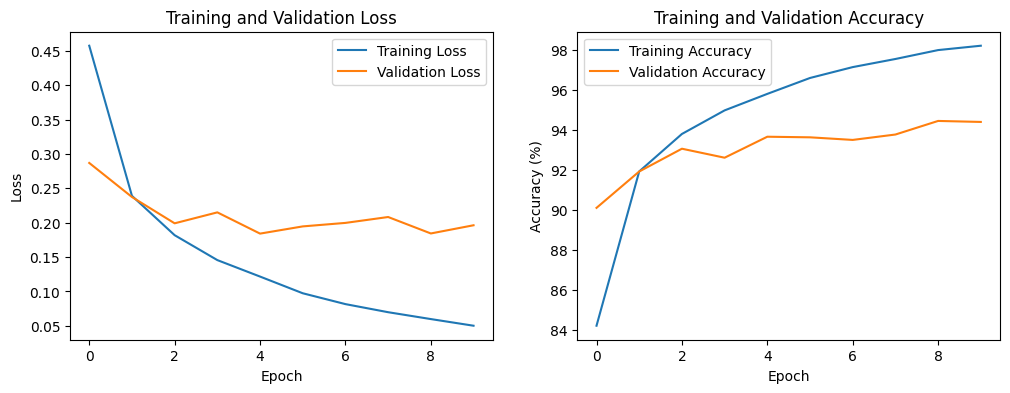

In [ ]:
# VGG_19 pretrained=True
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define a function to load CIFAR-10 data
def load_cifar10_data(batch_size=64):
    transform = transforms.Compose(
        [transforms.RandomHorizontalFlip(),
         transforms.Resize(224),
         transforms.RandomCrop(224, padding=4),
         transforms.ToTensor(),
         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

    trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                              shuffle=True, num_workers=2)

    testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                           download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                             shuffle=False, num_workers=2)

    classes = ('plane', 'car', 'bird', 'cat',
               'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

    return trainloader, testloader, classes


# Load CIFAR-10 data
trainloader, testloader, classes = load_cifar10_data(batch_size=64)

# Define the VGG19 model with pretrained=False
import torchvision.models as models
model = models.vgg19(pretrained=True)
model.classifier[6] = nn.Linear(4096, 10)

# Set hyperparameters
learning_rate = 0.001
epochs = 10

# Check if a GPU is available, otherwise use CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

# Define the training function
def train(net, trainloader, criterion, optimizer, device):
    net.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_loss = running_loss / (i + 1)
    train_accuracy = 100 * correct / total
    return train_loss, train_accuracy

# Define the testing function
def test(net, testloader, criterion, device):
    net.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = net(inputs)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    test_loss = running_loss / len(testloader)
    test_accuracy = 100 * correct / total
    return test_loss, test_accuracy

# Training loop
train_losses, train_accuracies, test_losses, test_accuracies = [], [], [], []
for epoch in range(epochs):
    train_loss, train_accuracy = train(model, trainloader, criterion, optimizer, device)
    test_loss, test_accuracy = test(model, testloader, criterion, device)

    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    print(f"Epoch {epoch+1}/{epochs}:")
    print(f"  Training Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.2f}%")
    print(f"  Testing Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.2f}%")

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Training Loss")
plt.plot(test_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title('Training and Validation Loss')

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label="Training Accuracy")
plt.plot(test_accuracies, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()

Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch 1/10:
  Training Loss: 1.7512, Accuracy: 35.38%
  Testing Loss: 1.5255, Accuracy: 43.50%
Epoch 2/10:
  Training Loss: 1.4785, Accuracy: 46.16%
  Testing Loss: 1.4121, Accuracy: 48.91%
Epoch 3/10:
  Training Loss: 1.3591, Accuracy: 50.65%
  Testing Loss: 1.2972, Accuracy: 53.18%
Epoch 4/10:
  Training Loss: 1.2582, Accuracy: 54.67%
  Testing Loss: 1.2157, Accuracy: 56.12%
Epoch 5/10:
  Training Loss: 1.1816, Accuracy: 57.53%
  Testing Loss: 1.1578, Accuracy: 57.56%
Epoch 6/10:
  Training Loss: 1.1128, Accuracy: 60.27%
  Testing Loss: 1.1154, Accuracy: 60.11%
Epoch 7/10:
  Training Loss: 1.0542, Accuracy: 62.28%
  Testing Loss: 1.0664, Accuracy: 62.29%
Epoch 8/10:
  Training Loss: 1.0048, Accuracy: 64.14%
  Testing Loss: 1.0233, Accuracy: 63.45%
Epoch 9/10:
  Training Loss: 0.9640, Accuracy: 65.65%
  Testing Loss: 0.9724, Accuracy: 65.28%
Epoch 10/10:
  Training Loss: 0.9316, Accuracy: 66.84%
  Testing Loss: 0.9399, Accuracy: 66.51%


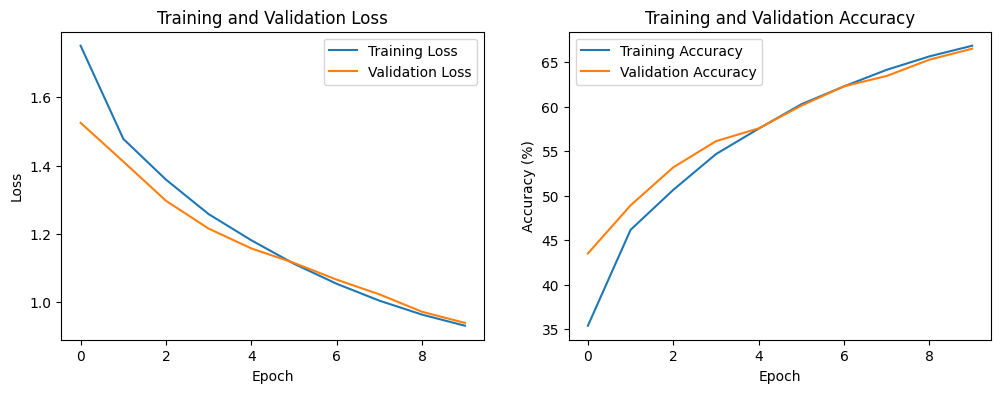

In [ ]:
# resnet18(pretrained=False)
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define a function to load CIFAR-10 data
def load_cifar10_data(batch_size=64):
    transform = transforms.Compose(
        [transforms.RandomHorizontalFlip(),
         transforms.RandomCrop(32, padding=4),
         transforms.ToTensor(),
         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

    trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                              shuffle=True, num_workers=2)

    testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                           download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                             shuffle=False, num_workers=2)

    classes = ('plane', 'car', 'bird', 'cat',
               'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

    return trainloader, testloader, classes

# Load CIFAR-10 data
trainloader, testloader, classes = load_cifar10_data(batch_size=64)

# Define the ResNet-18 model with pretrained=False
import torchvision.models as models
model = models.resnet18(pretrained=False)
model.fc = nn.Linear(512, 10)  # Modify the classifier for 10 classes

# Set hyperparameters
learning_rate = 0.001
epochs = 10

# Check if a GPU is available, otherwise use CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

# Define the training function
def train(net, trainloader, criterion, optimizer, device):
    net.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_loss = running_loss / (i + 1)
    train_accuracy = 100 * correct / total
    return train_loss, train_accuracy

# Define the testing function
def test(net, testloader, criterion, device):
    net.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = net(inputs)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    test_loss = running_loss / len(testloader)
    test_accuracy = 100 * correct / total
    return test_loss, test_accuracy

# Training loop
train_losses, train_accuracies, test_losses, test_accuracies = [], [], [], []
for epoch in range(epochs):
    train_loss, train_accuracy = train(model, trainloader, criterion, optimizer, device)
    test_loss, test_accuracy = test(model, testloader, criterion, device)

    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    print(f"Epoch {epoch+1}/{epochs}:")
    print(f"  Training Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.2f}%")
    print(f"  Testing Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.2f}%")

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Training Loss")
plt.plot(test_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title('Training and Validation Loss')

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label="Training Accuracy")
plt.plot(test_accuracies, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()

Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 89.8MB/s]


Epoch 1/10:
  Training Loss: 1.1888, Accuracy: 58.06%
  Testing Loss: 0.8793, Accuracy: 69.05%
Epoch 2/10:
  Training Loss: 0.8295, Accuracy: 71.25%
  Testing Loss: 0.7412, Accuracy: 74.32%
Epoch 3/10:
  Training Loss: 0.7170, Accuracy: 75.19%
  Testing Loss: 0.6789, Accuracy: 76.40%
Epoch 4/10:
  Training Loss: 0.6460, Accuracy: 77.61%
  Testing Loss: 0.6457, Accuracy: 77.43%
Epoch 5/10:
  Training Loss: 0.5992, Accuracy: 79.15%
  Testing Loss: 0.6096, Accuracy: 78.68%
Epoch 6/10:
  Training Loss: 0.5607, Accuracy: 80.32%
  Testing Loss: 0.6051, Accuracy: 79.53%
Epoch 7/10:
  Training Loss: 0.5349, Accuracy: 81.33%
  Testing Loss: 0.5780, Accuracy: 80.23%
Epoch 8/10:
  Training Loss: 0.4997, Accuracy: 82.63%
  Testing Loss: 0.5703, Accuracy: 80.77%
Epoch 9/10:
  Training Loss: 0.4738, Accuracy: 83.36%
  Testing Loss: 0.5650, Accuracy: 80.31%
Epoch 10/10:
  Training Loss: 0.4562, Accuracy: 84.10%
  Testing Loss: 0.5520, Accuracy: 81.35%


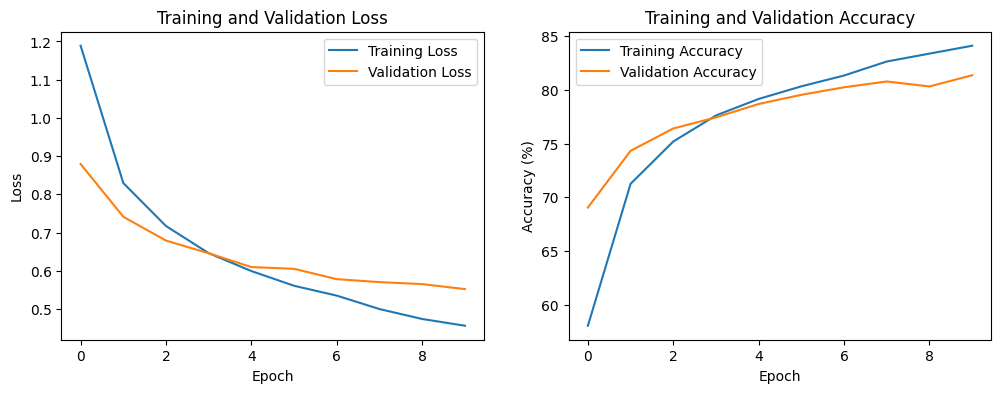

In [ ]:
# resnet18(pretrained=True)
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define a function to load CIFAR-10 data
def load_cifar10_data(batch_size=64):
    transform = transforms.Compose(
        [transforms.RandomHorizontalFlip(),
         transforms.RandomCrop(32, padding=4),
         transforms.ToTensor(),
         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

    trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                              shuffle=True, num_workers=2)

    testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                           download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                             shuffle=False, num_workers=2)

    classes = ('plane', 'car', 'bird', 'cat',
               'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

    return trainloader, testloader, classes

# Load CIFAR-10 data
trainloader, testloader, classes = load_cifar10_data(batch_size=64)

# Define the ResNet-18 model with pretrained=False
import torchvision.models as models
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(512, 10)  # Modify the classifier for 10 classes

# Set hyperparameters
learning_rate = 0.001
epochs = 10

# Check if a GPU is available, otherwise use CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

# Define the training function
def train(net, trainloader, criterion, optimizer, device):
    net.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_loss = running_loss / (i + 1)
    train_accuracy = 100 * correct / total
    return train_loss, train_accuracy

# Define the testing function
def test(net, testloader, criterion, device):
    net.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = net(inputs)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    test_loss = running_loss / len(testloader)
    test_accuracy = 100 * correct / total
    return test_loss, test_accuracy

# Training loop
train_losses, train_accuracies, test_losses, test_accuracies = [], [], [], []
for epoch in range(epochs):
    train_loss, train_accuracy = train(model, trainloader, criterion, optimizer, device)
    test_loss, test_accuracy = test(model, testloader, criterion, device)

    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    print(f"Epoch {epoch+1}/{epochs}:")
    print(f"  Training Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.2f}%")
    print(f"  Testing Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.2f}%")

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Training Loss")
plt.plot(test_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title('Training and Validation Loss')

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label="Training Accuracy")
plt.plot(test_accuracies, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()

Files already downloaded and verified
Files already downloaded and verified
Epoch 1/10:
  Training Loss: 1.8410, Accuracy: 32.17%
  Testing Loss: 1.6042, Accuracy: 40.70%
Epoch 2/10:
  Training Loss: 1.5231, Accuracy: 44.20%
  Testing Loss: 1.4245, Accuracy: 47.87%
Epoch 3/10:
  Training Loss: 1.3971, Accuracy: 49.02%
  Testing Loss: 1.3422, Accuracy: 50.81%
Epoch 4/10:
  Training Loss: 1.2987, Accuracy: 53.05%
  Testing Loss: 1.2233, Accuracy: 55.15%
Epoch 5/10:
  Training Loss: 1.2185, Accuracy: 56.00%
  Testing Loss: 1.1919, Accuracy: 56.60%
Epoch 6/10:
  Training Loss: 1.1521, Accuracy: 58.52%
  Testing Loss: 1.1382, Accuracy: 59.04%
Epoch 7/10:
  Training Loss: 1.0955, Accuracy: 60.60%
  Testing Loss: 1.0879, Accuracy: 61.15%
Epoch 8/10:
  Training Loss: 1.0484, Accuracy: 62.54%
  Testing Loss: 1.0578, Accuracy: 62.01%
Epoch 9/10:
  Training Loss: 1.0048, Accuracy: 64.29%
  Testing Loss: 1.0165, Accuracy: 63.74%
Epoch 10/10:
  Training Loss: 0.9692, Accuracy: 65.56%
  Testing Loss

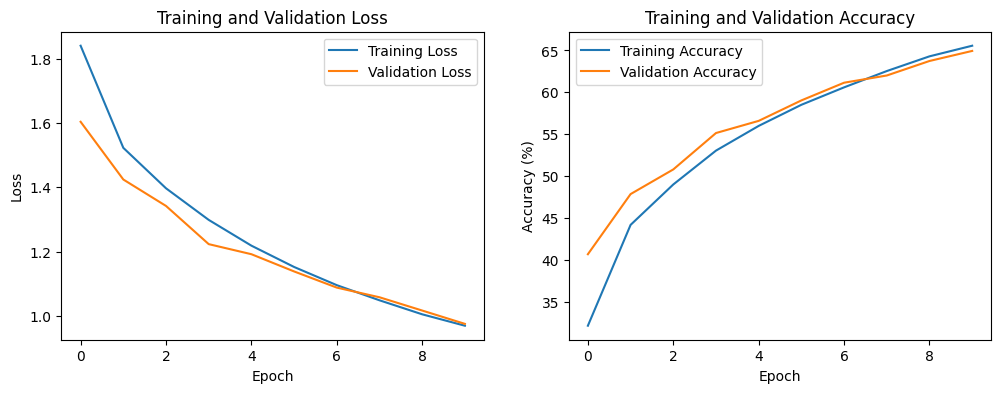

In [ ]:
# resnet34(pretrained=False)
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define a function to load CIFAR-10 data
def load_cifar10_data(batch_size=64):
    transform = transforms.Compose(
        [transforms.RandomHorizontalFlip(),
         transforms.RandomCrop(32, padding=4),
         transforms.ToTensor(),
         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

    trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                              shuffle=True, num_workers=2)

    testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                           download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                             shuffle=False, num_workers=2)

    classes = ('plane', 'car', 'bird', 'cat',
               'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

    return trainloader, testloader, classes

# Load CIFAR-10 data
trainloader, testloader, classes = load_cifar10_data(batch_size=64)

# Define the ResNet-34 model with pretrained=False
import torchvision.models as models
model = models.resnet34(pretrained=False)
model.fc = nn.Linear(512, 10)  # Modify the classifier for 10 classes

# Set hyperparameters
learning_rate = 0.001
epochs = 10

# Check if a GPU is available, otherwise use CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

# Define the training function
def train(net, trainloader, criterion, optimizer, device):
    net.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_loss = running_loss / (i + 1)
    train_accuracy = 100 * correct / total
    return train_loss, train_accuracy

# Define the testing function
def test(net, testloader, criterion, device):
    net.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = net(inputs)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    test_loss = running_loss / len(testloader)
    test_accuracy = 100 * correct / total
    return test_loss, test_accuracy

# Training loop
train_losses, train_accuracies, test_losses, test_accuracies = [], [], [], []
for epoch in range(epochs):
    train_loss, train_accuracy = train(model, trainloader, criterion, optimizer, device)
    test_loss, test_accuracy = test(model, testloader, criterion, device)

    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    print(f"Epoch {epoch+1}/{epochs}:")
    print(f"  Training Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.2f}%")
    print(f"  Testing Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.2f}%")

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Training Loss")
plt.plot(test_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title('Training and Validation Loss')

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label="Training Accuracy")
plt.plot(test_accuracies, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()

Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 150MB/s]


Epoch 1/10:
  Training Loss: 1.1466, Accuracy: 59.50%
  Testing Loss: 0.8204, Accuracy: 71.54%
Epoch 2/10:
  Training Loss: 0.7774, Accuracy: 72.86%
  Testing Loss: 0.6915, Accuracy: 76.03%
Epoch 3/10:
  Training Loss: 0.6579, Accuracy: 77.10%
  Testing Loss: 0.6331, Accuracy: 78.29%
Epoch 4/10:
  Training Loss: 0.5922, Accuracy: 79.47%
  Testing Loss: 0.5940, Accuracy: 79.48%
Epoch 5/10:
  Training Loss: 0.5376, Accuracy: 81.29%
  Testing Loss: 0.5664, Accuracy: 80.64%
Epoch 6/10:
  Training Loss: 0.5049, Accuracy: 82.41%
  Testing Loss: 0.5466, Accuracy: 81.06%
Epoch 7/10:
  Training Loss: 0.4715, Accuracy: 83.56%
  Testing Loss: 0.5314, Accuracy: 81.57%
Epoch 8/10:
  Training Loss: 0.4478, Accuracy: 84.34%
  Testing Loss: 0.5274, Accuracy: 81.85%
Epoch 9/10:
  Training Loss: 0.4188, Accuracy: 85.26%
  Testing Loss: 0.5197, Accuracy: 82.16%
Epoch 10/10:
  Training Loss: 0.3965, Accuracy: 86.14%
  Testing Loss: 0.5146, Accuracy: 81.47%


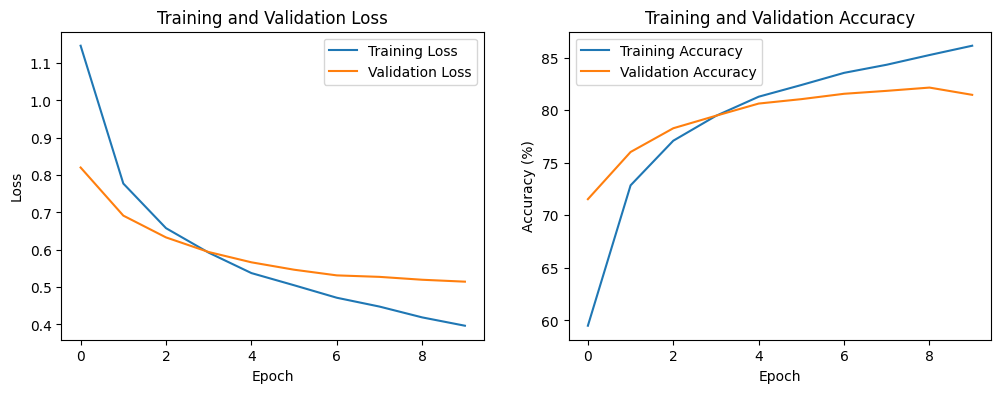

In [ ]:
# resnet34(pretrained=True)
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define a function to load CIFAR-10 data
def load_cifar10_data(batch_size=64):
    transform = transforms.Compose(
        [transforms.RandomHorizontalFlip(),
         transforms.RandomCrop(32, padding=4),
         transforms.ToTensor(),
         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

    trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                              shuffle=True, num_workers=2)

    testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                           download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                             shuffle=False, num_workers=2)

    classes = ('plane', 'car', 'bird', 'cat',
               'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

    return trainloader, testloader, classes

# Load CIFAR-10 data
trainloader, testloader, classes = load_cifar10_data(batch_size=64)

# Define the ResNet-34 model with pretrained=False
import torchvision.models as models
model = models.resnet34(pretrained=True)
model.fc = nn.Linear(512, 10)  # Modify the classifier for 10 classes

# Set hyperparameters
learning_rate = 0.001
epochs = 10

# Check if a GPU is available, otherwise use CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

# Define the training function
def train(net, trainloader, criterion, optimizer, device):
    net.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_loss = running_loss / (i + 1)
    train_accuracy = 100 * correct / total
    return train_loss, train_accuracy

# Define the testing function
def test(net, testloader, criterion, device):
    net.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = net(inputs)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    test_loss = running_loss / len(testloader)
    test_accuracy = 100 * correct / total
    return test_loss, test_accuracy

# Training loop
train_losses, train_accuracies, test_losses, test_accuracies = [], [], [], []
for epoch in range(epochs):
    train_loss, train_accuracy = train(model, trainloader, criterion, optimizer, device)
    test_loss, test_accuracy = test(model, testloader, criterion, device)

    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    print(f"Epoch {epoch+1}/{epochs}:")
    print(f"  Training Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.2f}%")
    print(f"  Testing Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.2f}%")

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Training Loss")
plt.plot(test_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title('Training and Validation Loss')

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label="Training Accuracy")
plt.plot(test_accuracies, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()

Files already downloaded and verified
Files already downloaded and verified
Epoch 1/10:
  Training Loss: 2.2190, Accuracy: 22.13%
  Testing Loss: 1.9685, Accuracy: 28.84%
Epoch 2/10:
  Training Loss: 1.9046, Accuracy: 32.21%
  Testing Loss: 1.8084, Accuracy: 35.52%
Epoch 3/10:
  Training Loss: 1.7340, Accuracy: 37.55%
  Testing Loss: 1.6526, Accuracy: 39.63%
Epoch 4/10:
  Training Loss: 1.6245, Accuracy: 41.25%
  Testing Loss: 1.5364, Accuracy: 43.53%
Epoch 5/10:
  Training Loss: 1.5595, Accuracy: 43.86%
  Testing Loss: 1.4819, Accuracy: 46.32%
Epoch 6/10:
  Training Loss: 1.5025, Accuracy: 45.88%
  Testing Loss: 1.5008, Accuracy: 47.00%
Epoch 7/10:
  Training Loss: 1.4484, Accuracy: 47.96%
  Testing Loss: 1.4091, Accuracy: 49.27%
Epoch 8/10:
  Training Loss: 1.3982, Accuracy: 49.52%
  Testing Loss: 1.4050, Accuracy: 49.89%
Epoch 9/10:
  Training Loss: 1.3679, Accuracy: 51.15%
  Testing Loss: 1.3348, Accuracy: 51.62%
Epoch 10/10:
  Training Loss: 1.3321, Accuracy: 52.41%
  Testing Loss

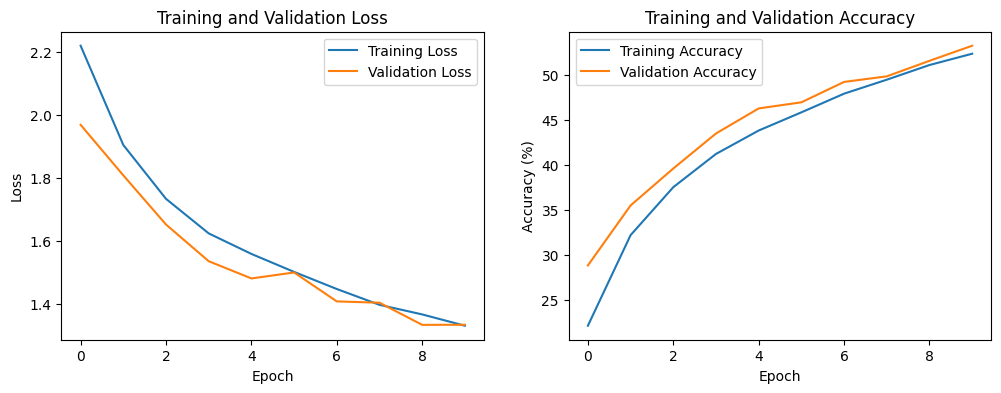

In [ ]:
# resnet50(pretrained=False)
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define a function to load CIFAR-10 data
def load_cifar10_data(batch_size=64):
    transform = transforms.Compose(
        [transforms.RandomHorizontalFlip(),
         transforms.RandomCrop(32, padding=4),
         transforms.ToTensor(),
         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

    trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                              shuffle=True, num_workers=2)

    testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                           download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                             shuffle=False, num_workers=2)

    classes = ('plane', 'car', 'bird', 'cat',
               'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

    return trainloader, testloader, classes

# Load CIFAR-10 data
trainloader, testloader, classes = load_cifar10_data(batch_size=64)

# Define the ResNet-50 model with pretrained=False
import torchvision.models as models
model = models.resnet50(pretrained=False)
model.fc = nn.Linear(2048, 10)  # Modify the classifier for 10 classes

# Set hyperparameters
learning_rate = 0.001
epochs = 10

# Check if a GPU is available, otherwise use CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

# Define the training function
def train(net, trainloader, criterion, optimizer, device):
    net.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_loss = running_loss / (i + 1)
    train_accuracy = 100 * correct / total
    return train_loss, train_accuracy

# Define the testing function
def test(net, testloader, criterion, device):
    net.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = net(inputs)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    test_loss = running_loss / len(testloader)
    test_accuracy = 100 * correct / total
    return test_loss, test_accuracy

# Training loop
train_losses, train_accuracies, test_losses, test_accuracies = [], [], [], []
for epoch in range(epochs):
    train_loss, train_accuracy = train(model, trainloader, criterion, optimizer, device)
    test_loss, test_accuracy = test(model, testloader, criterion, device)

    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    print(f"Epoch {epoch+1}/{epochs}:")
    print(f"  Training Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.2f}%")
    print(f"  Testing Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.2f}%")

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Training Loss")
plt.plot(test_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title('Training and Validation Loss')

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label="Training Accuracy")
plt.plot(test_accuracies, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()

Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 154MB/s]


Epoch 1/10:
  Training Loss: 1.1119, Accuracy: 61.29%
  Testing Loss: 0.7549, Accuracy: 74.29%
Epoch 2/10:
  Training Loss: 0.6977, Accuracy: 75.90%
  Testing Loss: 0.6100, Accuracy: 78.73%
Epoch 3/10:
  Training Loss: 0.5923, Accuracy: 79.59%
  Testing Loss: 0.5694, Accuracy: 81.20%
Epoch 4/10:
  Training Loss: 0.5221, Accuracy: 81.88%
  Testing Loss: 0.5220, Accuracy: 82.13%
Epoch 5/10:
  Training Loss: 0.4725, Accuracy: 83.41%
  Testing Loss: 0.4927, Accuracy: 82.91%
Epoch 6/10:
  Training Loss: 0.4250, Accuracy: 85.17%
  Testing Loss: 0.4728, Accuracy: 84.00%
Epoch 7/10:
  Training Loss: 0.3965, Accuracy: 86.28%
  Testing Loss: 0.4741, Accuracy: 84.05%
Epoch 8/10:
  Training Loss: 0.3659, Accuracy: 87.19%
  Testing Loss: 0.4568, Accuracy: 85.02%
Epoch 9/10:
  Training Loss: 0.3433, Accuracy: 87.93%
  Testing Loss: 0.4532, Accuracy: 85.07%
Epoch 10/10:
  Training Loss: 0.3203, Accuracy: 88.56%
  Testing Loss: 0.4621, Accuracy: 84.90%


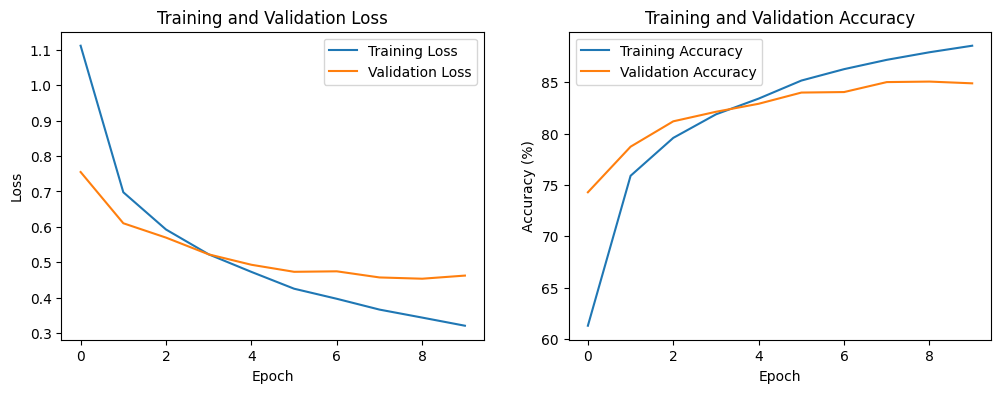

In [ ]:
# resnet50(pretrained=True)
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define a function to load CIFAR-10 data
def load_cifar10_data(batch_size=64):
    transform = transforms.Compose(
        [transforms.RandomHorizontalFlip(),
         transforms.RandomCrop(32, padding=4),
         transforms.ToTensor(),
         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

    trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                              shuffle=True, num_workers=2)

    testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                           download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                             shuffle=False, num_workers=2)

    classes = ('plane', 'car', 'bird', 'cat',
               'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

    return trainloader, testloader, classes

# Load CIFAR-10 data
trainloader, testloader, classes = load_cifar10_data(batch_size=64)

# Define the ResNet-50 model with pretrained=False
import torchvision.models as models
model = models.resnet50(pretrained=True)
model.fc = nn.Linear(2048, 10)  # Modify the classifier for 10 classes

# Set hyperparameters
learning_rate = 0.001
epochs = 10

# Check if a GPU is available, otherwise use CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

# Define the training function
def train(net, trainloader, criterion, optimizer, device):
    net.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_loss = running_loss / (i + 1)
    train_accuracy = 100 * correct / total
    return train_loss, train_accuracy

# Define the testing function
def test(net, testloader, criterion, device):
    net.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = net(inputs)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    test_loss = running_loss / len(testloader)
    test_accuracy = 100 * correct / total
    return test_loss, test_accuracy

# Training loop
train_losses, train_accuracies, test_losses, test_accuracies = [], [], [], []
for epoch in range(epochs):
    train_loss, train_accuracy = train(model, trainloader, criterion, optimizer, device)
    test_loss, test_accuracy = test(model, testloader, criterion, device)

    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    print(f"Epoch {epoch+1}/{epochs}:")
    print(f"  Training Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.2f}%")
    print(f"  Testing Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.2f}%")

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Training Loss")
plt.plot(test_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title('Training and Validation Loss')

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label="Training Accuracy")
plt.plot(test_accuracies, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()